**Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.**

Fonte dos dados : https://opendatasus.saude.gov.br/dataset/bd-srag-2020



In [1]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cols = ['SEM_NOT', 'DT_NOTIFIC', 'SG_UF_NOT', 'CS_SEXO', 'DT_NASC', 'NU_IDADE_N', 'TP_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ETINIA', 'CS_ESCOL_N', 'SG_UF', 'CLASSI_FIN', 'NOSOCOMIAL', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'OUTRO_DES', 'CLASSI_OUT', 'EVOLUCAO', 'PCR_RESUL', 'DS_IF_OUT','IF_RESUL','PCR_SARS2','DS_PCR_OUT','PCR_OUTRO']

In [3]:
df = pd.read_csv(r'arquivos\INFLUD_09-06-2020.csv', usecols=cols, delimiter=';', encoding='ISO-8859-1')

d:\mylib\pessoal\estudos\fatec\bd\6semestre\bd_nao_estruturado\analise-dados-publicos-covid19\venv\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (18,119) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Tabelas de microdados usam números, faço a correspondência desses números com seus significados
troca_pcr_res = {1:'Detectável', 2:'Não Detectável', 3:'Inconclusivo',4:'Aguardando Resultado', 5:'Aguardando Resultado', 9:'Ignorado'}
troca_if_res = {1:'Positivo', 2:'Negativo', 3:'Inconclusivo',4:'Não Realizado', 5:'Aguardando', 9:'Ignorado'}
troca_raca = {1:'Branca', 2:'Preta', 3:'Amarela', 4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 2:'Fund2', 3:'Médio', 4:'Superior', 5:'Não se aplica', 9:'Ignorado'}

In [5]:
#Trocando valores vazios para ignorados
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df.loc[(df.PCR_RESUL.isnull()), 'PCR_RESUL'] = 9
df.loc[(df.IF_RESUL.isnull()), 'IF_RESUL'] = 9

#Aplicando os valores do dicionario de dados
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raca[x])
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])
df['PCR_RESUL'] = df['PCR_RESUL'].apply(lambda x: troca_pcr_res[x])
df['IF_RESUL'] = df['IF_RESUL'].apply(lambda x: troca_if_res[x])

df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['DT_NOTIFIC'].dropna(inplace=True)


In [9]:
def groupedbarplot(x_data, y_data_list, colors, y_data_names="", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Total width for all bars at one x location
    total_width = 0.8
    # Width of each individual bar
    ind_width = total_width / len(y_data_list)
    # This centers each cluster of bars about the x tick mark
    alteration = np.arange(-(total_width/2), total_width/2, ind_width)

    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        # Move the bar to the right on the x-axis so it doesn't
        # overlap with previously drawn ones
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

In [10]:
colors = ['red','green','blue','gold','violet']

TypeError: can only concatenate str (not "float") to str

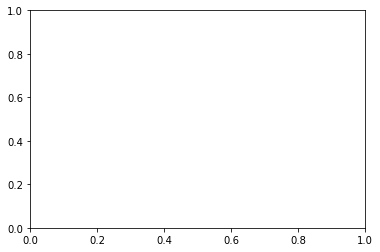

In [11]:
#Mostrar resultados de RT-PCR por semana
groupedbarplot(df,['PCR_RESUL','SEM_NOT'], colors)

In [ ]:
#Mostrar resultados de RT-PCR por semana
groupedbarplot(df,['IF_RESUL','SEM_NOT'], colors)

In [ ]:
#filtra os valores relacionados a COVID-19
df = df.query("CLASSI_FIN == 5 or CLASSI_OUT.str.contains('CORONA|COVID|COV|SARS|19') or DS_IF_OUT.str.contains('COV|SARS|CORONA') or DS_PCR_OUT.str.contains('COVID|SARS|COV2|19')", engine='python')

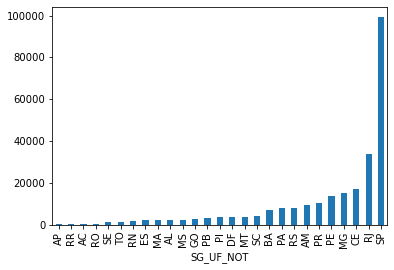

In [6]:
#Numero de infectados por estado
df.groupby('SG_UF_NOT').size().sort_values().plot(kind='bar')

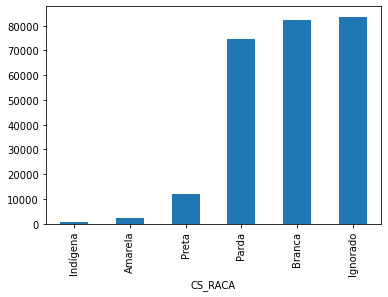

In [7]:
#Numero de infectados por raça
df.groupby('CS_RACA').size().sort_values().plot(kind='bar')

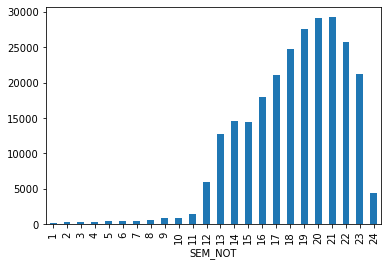

In [8]:
#Numero de infectados por semana
df.groupby('SEM_NOT').size().plot(kind='bar')